In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=2, threads_per_worker=2,dashboard_address=':8888')

client = Client(cluster)
client

/mnt/meom/workdir/henelle/.Anaconda3/envs/erh1/lib/python3.8/site-packages/distributed/dashboard/core.py:79: UserWarning: 
Port 8888 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:44887 Dashboard: http://127.0.0.1:35897/status,Cluster Workers: 2 Cores: 4 Memory: 35.01 GB


In [2]:
## Path for modules

import sys

import numpy as np
import xarray as xr

from netCDF4 import Dataset

sys.path.insert(0,"/mnt/meom/workdir/henelle/Notebooks/git/xscale")
import xscale
import xscale.spectral.fft as xfft

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy.ma as ma

sys.path.insert(0,"/mnt/meom/workdir/henelle/Notebooks/git/")
import myfunctions as mf

import matplotlib.cm as mplcm
import matplotlib.colors as colors
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date, datetime
from xhistogram.xarray import histogram

import pandas as pd

%matplotlib inline

### 1. Choosing season

In [3]:
season = 'JAS'

### 2. Defining regions of interest

In [4]:
regionA1 = 'A1'
regionA2 = 'A2'
regionA3 = 'A3'
regionB  = 'B'
regionC  = 'C'
regionD  = 'D'

In [5]:
!pwd

/mnt/meom/workdir/henelle/Notebooks/JPDFs


### 3. Opening pre-saved datasets

In [6]:
dataset_00_A1 = xr.open_dataset('histo2D_00_norm2'+regionA1+season+'_1.nc')
dataset_T0_A1 = xr.open_dataset('histo2D_T0_norm2'+regionA1+season+'_1.nc')

dataset_00_A2 = xr.open_dataset('histo2D_00_norm2'+regionA2+season+'_1.nc')
dataset_T0_A2 = xr.open_dataset('histo2D_T0_norm2'+regionA2+season+'_1.nc')

dataset_00_A3 = xr.open_dataset('histo2D_00_norm2'+regionA3+season+'_1.nc')
dataset_T0_A3 = xr.open_dataset('histo2D_T0_norm2'+regionA3+season+'_1.nc')


# release the file handle (not necessary but generally a good idea)
dataset_00_A1.close()
dataset_T0_A1.close()

dataset_00_A2.close()
dataset_T0_A2.close()

dataset_00_A3.close()
dataset_T0_A3.close()

In [7]:
dataset_00_B = xr.open_dataset('histo2D_00_norm2'+regionB+season+'_1.nc')
dataset_T0_B = xr.open_dataset('histo2D_T0_norm2'+regionB+season+'_1.nc')

dataset_00_C = xr.open_dataset('histo2D_00_norm2'+regionC+season+'_1.nc')
dataset_T0_C = xr.open_dataset('histo2D_T0_norm2'+regionC+season+'_1.nc')

dataset_00_D = xr.open_dataset('histo2D_00_norm2'+regionD+season+'_1.nc')
dataset_T0_D = xr.open_dataset('histo2D_T0_norm2'+regionD+season+'_1.nc')


# release the file handle (not necessary but generally a good idea)
dataset_00_B.close()
dataset_T0_B.close()

dataset_00_C.close()
dataset_T0_C.close()

dataset_00_D.close()
dataset_T0_D.close()

### 4. Plotting JPDFs of the logarithm of the ratio

/mnt/meom/workdir/henelle/Notebooks/git/myfunctions.py:561: RuntimeWarning: divide by zero encountered in true_divide
  cb1 = ax1.pcolormesh(curlT0_bin, strain00_bin, np.log10(hist2D_T0_A1.data / hist2D_00_A1.data), cmap='RdBu_r',
/mnt/meom/workdir/henelle/Notebooks/git/myfunctions.py:561: RuntimeWarning: invalid value encountered in true_divide
  cb1 = ax1.pcolormesh(curlT0_bin, strain00_bin, np.log10(hist2D_T0_A1.data / hist2D_00_A1.data), cmap='RdBu_r',
/mnt/meom/workdir/henelle/Notebooks/git/myfunctions.py:561: RuntimeWarning: divide by zero encountered in log10
  cb1 = ax1.pcolormesh(curlT0_bin, strain00_bin, np.log10(hist2D_T0_A1.data / hist2D_00_A1.data), cmap='RdBu_r',
/mnt/meom/workdir/henelle/Notebooks/git/myfunctions.py:564: RuntimeWarning: divide by zero encountered in true_divide
  cb2 = ax2.pcolormesh(curlT0_bin, strain00_bin, np.log10(hist2D_T0_A2.data / hist2D_00_A2.data), cmap='RdBu_r',
/mnt/meom/workdir/henelle/Notebooks/git/myfunctions.py:564: RuntimeWarning: invalid

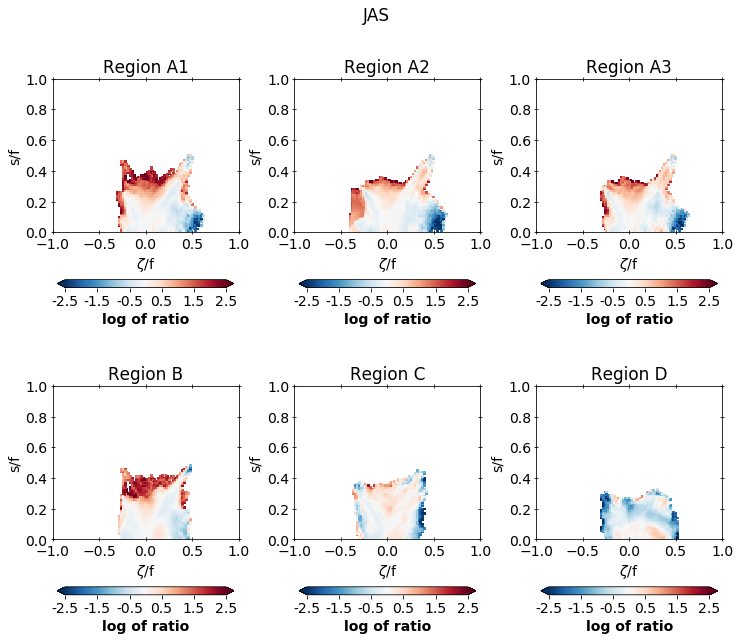

In [8]:
mf.JPDF_diff(dataset_00_A1.histogram_strain00_curl00,dataset_T0_A1.histogram_strainT0_curlT0,
             dataset_00_A2.histogram_strain00_curl00,dataset_T0_A2.histogram_strainT0_curlT0,
             dataset_00_A3.histogram_strain00_curl00,dataset_T0_A3.histogram_strainT0_curlT0,
             dataset_00_B.histogram_strain00_curl00,dataset_T0_B.histogram_strainT0_curlT0,
             dataset_00_C.histogram_strain00_curl00,dataset_T0_C.histogram_strainT0_curlT0,
             dataset_00_D.histogram_strain00_curl00,dataset_T0_D.histogram_strainT0_curlT0,
             dataset_T0_A1.histogram_strainT0_curlT0.curlT0_bin,dataset_00_A1.histogram_strain00_curl00.strain00_bin,
             regionA1,regionA2,regionA3,regionB,regionC,regionD,season,rmin=-2.5,rmax=2.5,dc=0.5)